<a href="https://colab.research.google.com/github/zainabasif747/FYP_DeepfakeDetection/blob/main/featurextraction1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
def rect2bb(rect):
    x = rect.left()
    y = rect.top()
    w = rect.right()-x
    h = rect.bottom()-y
    return (x,y,w,h)



In [2]:
def shape2np(shape, dtype="int"):
    coords = np.zeros((68, 2), dtype=dtype)

    for i in range(0, 68):
        coords[i] = (shape.part(i).x, shape.part(i).y)

    return coords

In [2]:
# Download the compressed predictor file
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

# Extract the .bz2 file to get the .dat file
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2


--2024-12-21 16:43:16--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  38.4MB/s    in 1.6s    

2024-12-21 16:43:17 (38.4 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [4]:
from google.colab import files
uploaded = files.upload()


Saving shape_predictor_68_face_landmarks .dat.bz2 to shape_predictor_68_face_landmarks .dat (1).bz2


Please upload an image:


Saving people-collage-design_23-2148888275.jpg to people-collage-design_23-2148888275 (1).jpg
6 face(s) detected in the image.


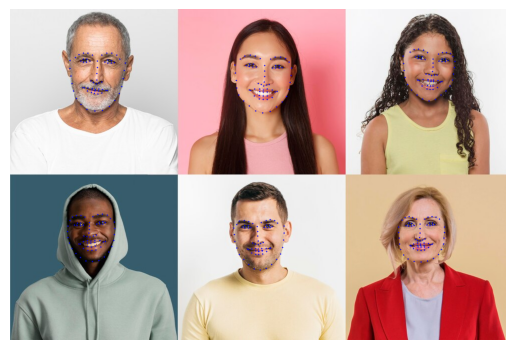

In [16]:
import dlib
import cv2
import numpy as np
import matplotlib.pyplot as plt
from imutils import face_utils
from google.colab import files

# Path to the already-uploaded shape predictor file
shape_predictor_path = "shape_predictor_68_face_landmarks.dat"  # Ensure this file exists in Colab

# Initialize face detector and shape predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(shape_predictor_path)

# Define helper function to convert dlib shape to NumPy array
def shape2np(shape):
    coords = np.zeros((68, 2), dtype=int)
    for i in range(68):
        coords[i] = (shape.part(i).x, shape.part(i).y)
    return coords

# Prompt the user to upload an image
print("Please upload an image:")
uploaded_image = files.upload()
image_path = list(uploaded_image.keys())[0]

# Load the uploaded image
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale for face detection

# Detect faces in the image
rects = detector(gray, 1)

# Check for faces and display the results
if len(rects) == 0:
    print("No faces detected in the image.")
else:
    print(f"{len(rects)} face(s) detected in the image.")

    # Draw landmarks on the image
    for (i, rect) in enumerate(rects):
        dots = predictor(gray, rect)  # Pass the grayscale image directly to the predictor
        dots = shape2np(dots)

        for (x, y) in dots:
            cv2.circle(image, (x, y), 1, (255, 0, 0), -1)

    # Display the image with landmarks
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert back to RGB for display
    plt.axis('off')
    plt.show()
